# Sentinel-2

1. За допомогою бібліотеки sentinelhub написати скрипт для завантаження супутникових знімків Sentinel-2, S2A_MSIL2A_20190821T085601_N0213_R007_T36UUB_20190821T115206

In [ ]:
import sentinelhub 
sentinelhub.download_safe_format('S2A_MSIL2A_20190821T085601_N0213_R007_T36UUB_20190821T115206')
sentinelhub.download_safe_format('S2A_MSIL2A_20190821T085601_N0213_R007_T36UUA_20190821T115206')

In [1]:
import rasterio
from rasterio.plot import show
import numpy as np
import sklearn.metrics

Конкатенація каналів видимого, ближнього та середнього інфрачервоного спектральних діапазонів (канали 2, 3, 4 та 8) зображення в єдиний GEOTIFF файл.


0...10...20...30...40...50...60...70...80...90...100 - done.


D:\anaconda\envs\lab7\Scripts\gdal_merge.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_merge.py')


0...10...20...30...40...50...60...70...80...90...100 - done.


D:\anaconda\envs\lab7\Scripts\gdal_merge.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_merge.py')


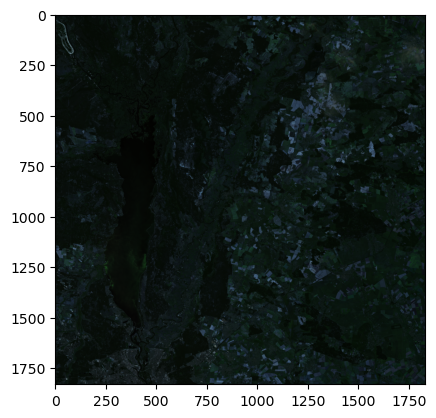

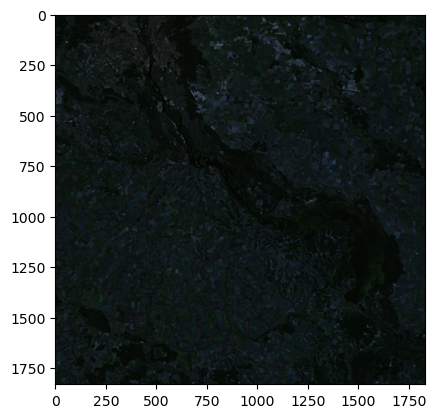

<Axes: >

In [2]:
BB02file='SentData\BSentData\GRANULE\L2A_T36UUB_A021740_20190821T085815\IMG_DATA\R60m\T36UUB_20190821T085601_B02_60m.jp2'
BB03file='SentData\BSentData\GRANULE\L2A_T36UUB_A021740_20190821T085815\IMG_DATA\R60m\T36UUB_20190821T085601_B03_60m.jp2'
BB04file='SentData\BSentData\GRANULE\L2A_T36UUB_A021740_20190821T085815\IMG_DATA\R60m\T36UUB_20190821T085601_B04_60m.jp2'
BB8Afile='SentData\BSentData\GRANULE\L2A_T36UUB_A021740_20190821T085815\IMG_DATA\R60m\T36UUB_20190821T085601_B8A_60m.jp2'

AB02file='SentData\ASentData\GRANULE\L2A_T36UUA_A021740_20190821T085815\IMG_DATA\R60m\T36UUA_20190821T085601_B02_60m.jp2'
AB03file='SentData\ASentData\GRANULE\L2A_T36UUA_A021740_20190821T085815\IMG_DATA\R60m\T36UUA_20190821T085601_B03_60m.jp2'
AB04file='SentData\ASentData\GRANULE\L2A_T36UUA_A021740_20190821T085815\IMG_DATA\R60m\T36UUA_20190821T085601_B04_60m.jp2'
AB8Afile='SentData\ASentData\GRANULE\L2A_T36UUA_A021740_20190821T085815\IMG_DATA\R60m\T36UUA_20190821T085601_B8A_60m.jp2'



!mkdir Sent\SentA
!mkdir Sent\SentB
!gdal_merge.py -o Sent\SentA\Asentmerge.tif -separate "$AB02file" "$AB03file" "$AB04file" "$AB8Afile"
!gdal_merge.py -o Sent\SentB\Bsentmerge.tif -separate "$BB02file" "$BB03file" "$BB04file" "$BB8Afile"




rAsentmerge=rasterio.open('Sent\SentA\Asentmerge.tif')
rBsentmerge=rasterio.open('Sent\SentB\Bsentmerge.tif')
show(rBsentmerge.read([1,2,3]),adjust=True)
show(rAsentmerge.read([1,2,3]),adjust=True)


Перепроектування супутникового зображення у проєкцію 4326.

Creating output file that is 2209P x 1423L.
Processing Sent\SentA\Asentmerge.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 2222P x 1404L.
Processing Sent\SentB\Bsentmerge.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


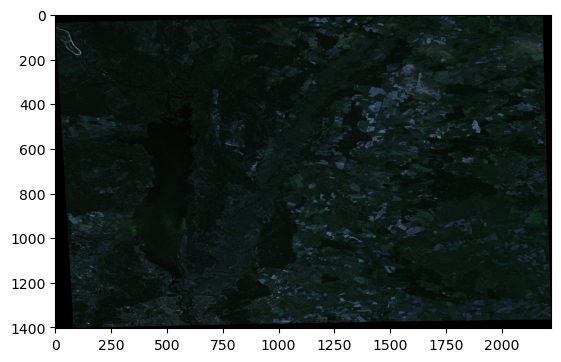

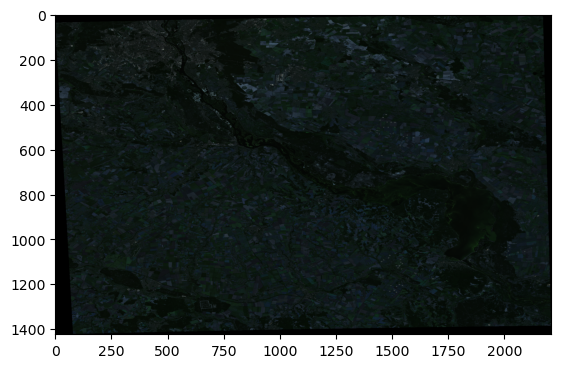

<Axes: >

In [3]:
!gdalwarp -t_srs EPSG:4326 Sent\SentA\Asentmerge.tif Sent\SentA\Asent4326.tif
!gdalwarp -t_srs EPSG:4326 Sent\SentB\Bsentmerge.tif Sent\SentB\Bsent4326.tif

rAsent4326=rasterio.open('Sent\SentA\Asent4326.tif')
rBsent4326=rasterio.open('Sent\SentB\Bsent4326.tif')
show(rBsent4326.read([1,2,3]),adjust=True)
show(rAsent4326.read([1,2,3]),adjust=True)

Конкатенація всіх отриманих растрів у один 4-канальний файл TIFF.

0...10...20...30...40...50...60...70...80...90...100 - done.


D:\anaconda\envs\lab7\Scripts\gdal_merge.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_merge.py')


0...10...20...30...40...50...60...70...80...90...100 - done.


D:\anaconda\envs\lab7\Scripts\gdal_merge.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_merge.py')


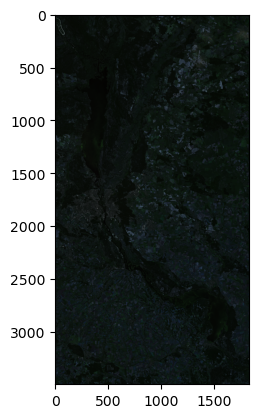

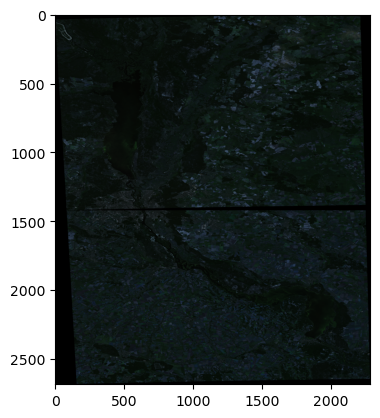

<Axes: >

In [4]:
!gdal_merge.py -o Sent\sentallmerge.tif Sent\SentA\Asentmerge.tif Sent\SentB\Bsentmerge.tif 
!gdal_merge.py -o Sent\sentall4326.tif Sent\SentA\Asent4326.tif Sent\SentB\Bsent4326.tif

rsentallmerge=rasterio.open('Sent\sentallmerge.tif')
rsentall4326=rasterio.open('Sent\sentall4326.tif')

show(rsentallmerge.read([1,2,3]),adjust=True)
show(rsentall4326.read([1,2,3]),adjust=True)


Обріжте зображення за вашим векторним файлом використовуючи gdalwarp

Creating output file that is 677P x 707L.
Processing Sent\sentallmerge.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


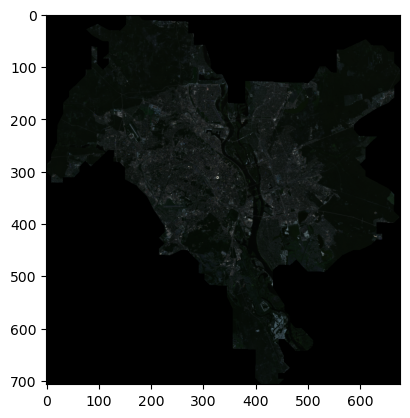

<Axes: >

In [5]:
!gdalwarp -cutline Kyiv\Kyiv_regions.shp -crop_to_cutline Sent\sentallmerge.tif Sent\cutsent.tif

rcutsent=rasterio.open('Sent\cutsent.tif')
show(rcutsent.read([1,2,3]),adjust=True)

# Landsat

Конкатенація каналів видимого, ближнього та середнього
інфрачервоного спектральних діапазонів (канали 2, 3, 4 та 8) зображення в
єдиний GEOTIFF файл.

0...10...20...30...40...50...60...70...80...90...100 - done.

D:\anaconda\envs\lab7\Scripts\gdal_merge.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_merge.py')


D:\anaconda\envs\lab7\Scripts\gdal_merge.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_merge.py')


0...10...20...30...40...50...60...70...80...90...100 - done.


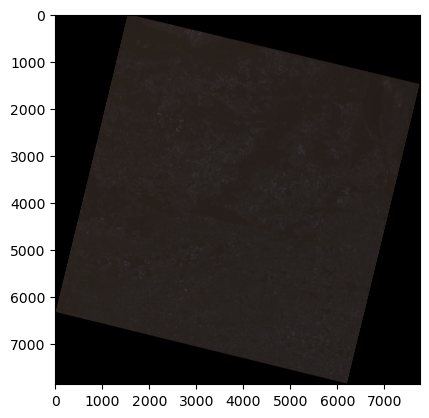

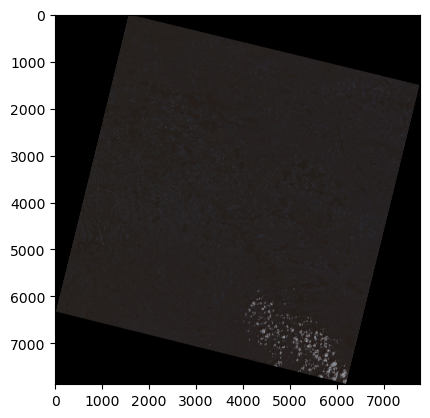

<Axes: >

In [6]:
FB2file='LandsatData\LandsatDataF\LC08_L1TP_182025_20190830_20200826_02_T1_B2.TIF'
FB3file='LandsatData\LandsatDataF\LC08_L1TP_182025_20190830_20200826_02_T1_B3.TIF'
FB4file='LandsatData\LandsatDataF\LC08_L1TP_182025_20190830_20200826_02_T1_B4.TIF'
FB8file='LandsatData\LandsatDataF\LC08_L1TP_182025_20190830_20200826_02_T1_B8.TIF'

SB2file='LandsatData\LandsatDataS\LC08_L1TP_182026_20190830_20200826_02_T1_B1.TIF'
SB3file='LandsatData\LandsatDataS\LC08_L1TP_182026_20190830_20200826_02_T1_B3.TIF'
SB4file='LandsatData\LandsatDataS\LC08_L1TP_182026_20190830_20200826_02_T1_B4.TIF'
SB8file='LandsatData\LandsatDataS\LC08_L1TP_182026_20190830_20200826_02_T1_B8.TIF'

!mkdir Landsat\LandsatF
!mkdir Landsat\LandsatS

!gdal_merge.py -o Landsat\LandsatF\Flandmerge.tif -separate "$FB2file" "$FB3file" "$FB4file" "$FB8file"
!gdal_merge.py -o Landsat\LandsatS\Slandmerge.tif -separate "$SB2file" "$SB3file" "$SB4file" "$SB8file"

rFlandmerge=rasterio.open('Landsat\LandsatF\Flandmerge.tif')
rSlandmerge=rasterio.open('Landsat\LandsatS\Slandmerge.tif')
show(rFlandmerge.read([1,2,3]),adjust=True)
show(rSlandmerge.read([1,2,3]),adjust=True)


Перепроектування супутникового зображення у проєкцію 4326.

Creating output file that is 9476P x 6325L.
Processing Landsat\LandsatS\Slandmerge.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 9656P x 6266L.
Processing Landsat\LandsatF\Flandmerge.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


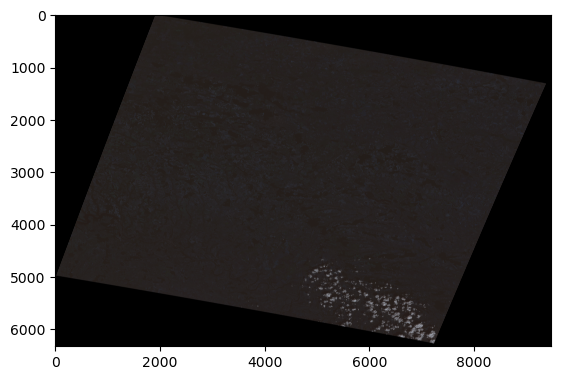

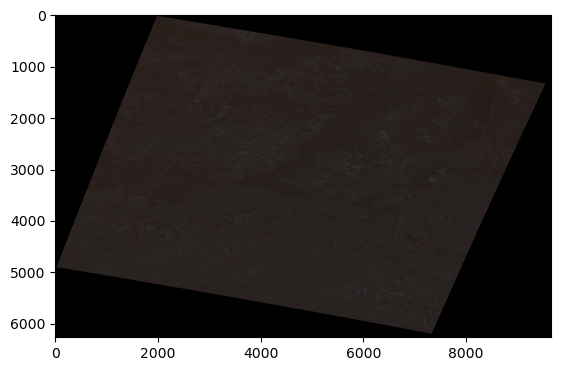

<Axes: >

In [7]:
!gdalwarp -t_srs EPSG:4326 Landsat\LandsatS\Slandmerge.tif Landsat\LandsatS\Sland4326.tif
!gdalwarp -t_srs EPSG:4326 Landsat\LandsatF\Flandmerge.tif Landsat\LandsatF\Fland4326.tif
rSland4326=rasterio.open('Landsat\LandsatS\Sland4326.tif')
rFland4326=rasterio.open('Landsat\LandsatF\Fland4326.tif')
show(rSland4326.read([1,2,3]),adjust=True)
show(rFland4326.read([1,2,3]),adjust=True)

Конкатенація всіх отриманих растрів у один 4-канальний файл TIFF.



0...10...20...30...40...50...60...70...80...90...100 - done.


D:\anaconda\envs\lab7\Scripts\gdal_merge.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_merge.py')


0...10...20...30...40...50...60...70...80...90...100 - done.


D:\anaconda\envs\lab7\Scripts\gdal_merge.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_merge.py')


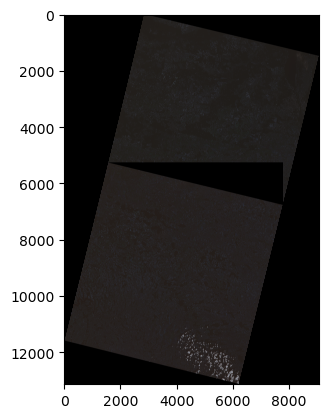

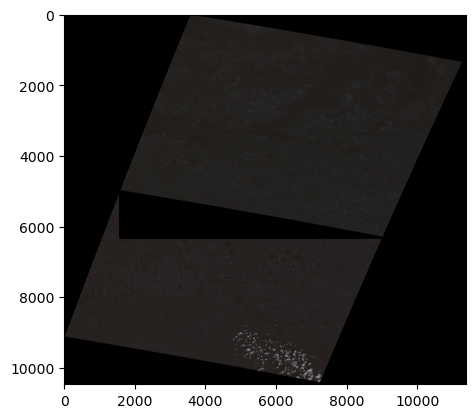

<Axes: >

In [8]:
!gdal_merge.py -o Landsat\landallmerge.tif Landsat\LandsatF\Flandmerge.tif Landsat\LandsatS\Slandmerge.tif 
!gdal_merge.py -o Landsat\landall4326.tif Landsat\LandsatS\Sland4326.tif Landsat\LandsatF\Fland4326.tif 

rlandallmerge=rasterio.open('Landsat\landallmerge.tif')
rlandall4326=rasterio.open('Landsat\landall4326.tif')

show(rlandallmerge.read([1,2,3]),adjust=True)
show(rlandall4326.read([1,2,3]),adjust=True)


Обріжте зображення за вашим векторним файлом використовуючи gdalwarp


Creating output file that is 1365P x 1370L.
Processing Landsat\landallmerge.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 1674P x 1098L.
Processing Landsat\landall4326.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


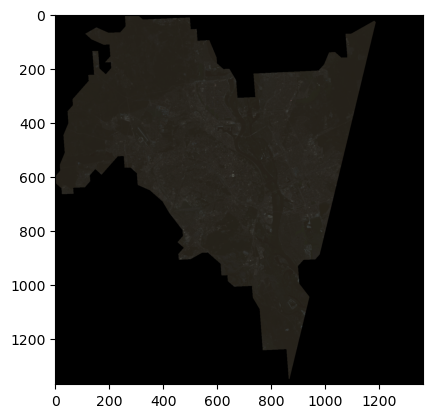

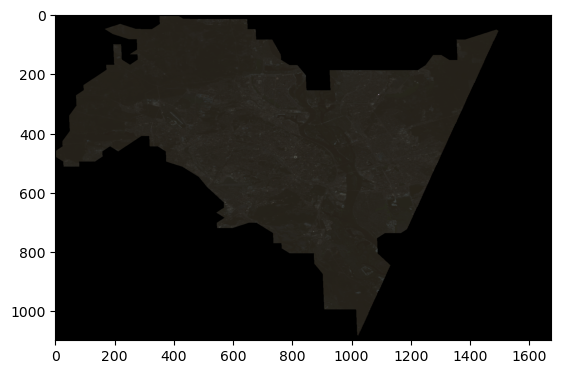

<Axes: >

In [9]:
!gdalwarp -cutline Kyiv/Kyiv_regions.shp -crop_to_cutline Landsat\landallmerge.tif Landsat\landcutmerge.tif
!gdalwarp -cutline Kyiv/Kyiv_regions.shp -crop_to_cutline Landsat\landall4326.tif Landsat\landcut4326.tif


rlandcutmerge=rasterio.open('Landsat\landcutmerge.tif')
rlandcut4326=rasterio.open('Landsat\landcut4326.tif')
show(rlandcutmerge.read([1,2,3]),adjust=True)
show(rlandcut4326.read([1,2,3]),adjust=True)

Переведіть панхроматичний канал у 30 м, а RGB канали у 60 метрів.

In [10]:
!mkdir Landsat\Pansharpen
!gdal_translate -tr 60 60 Landsat\LandsatF\Flandmerge.tif Landsat\Pansharpen\landrgb60.tif
!gdal_translate -tr 30 30 LandsatData\LandsatDataF\LC08_L1TP_182025_20190830_20200826_02_T1_B8.tif Landsat\Pansharpen\landp30.tif

Input file size is 7751, 7861
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 15501, 15721
0...10...20...30...40...50...60...70...80...90...100 - done.


Після цього паншарпніть 60 метровий RGB за допомогою 30 м панхроматичного каналу.

In [11]:

!gdal_pansharpen -r nearest Landsat\Pansharpen\landp30.tif Landsat\Pansharpen\landrgb60.tif  Landsat\Pansharpen\landparNEAREST.tif
!gdal_pansharpen -r bilinear Landsat\Pansharpen\landp30.tif Landsat\Pansharpen\landrgb60.tif Landsat\Pansharpen\landparBILINEAR.tif
!gdal_pansharpen -r cubic Landsat\Pansharpen\landp30.tif Landsat\Pansharpen\landrgb60.tif  Landsat\Pansharpen\landparCUBIC.tif
!gdal_pansharpen -r cubicspline Landsat\Pansharpen\landp30.tif Landsat\Pansharpen\landrgb60.tif Landsat\Pansharpen\landparCUBICSPLINE.tif
!gdal_pansharpen -r lanczos Landsat\Pansharpen\landp30.tif Landsat\Pansharpen\landrgb60.tif Landsat\Pansharpen\landparLANCZOS.tif
!gdal_pansharpen -r average Landsat\Pansharpen\landp30.tif Landsat\Pansharpen\landrgb60.tif Landsat\Pansharpen\landparAVERAGE.tif




0...10...20...30...40...50...60...70...80...90...100 - done.


D:\anaconda\envs\lab7\Scripts\gdal_pansharpen.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_pansharpen.py')


0...10...20...30...40...50...60...70...80...90...100 - done.


D:\anaconda\envs\lab7\Scripts\gdal_pansharpen.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_pansharpen.py')


0...10...20...30...40...50...60...70...80...90...100 - done.


D:\anaconda\envs\lab7\Scripts\gdal_pansharpen.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_pansharpen.py')


0...10...20...30...40...50...60...70...80...90...100 - done.

D:\anaconda\envs\lab7\Scripts\gdal_pansharpen.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_pansharpen.py')



0...10...20...30...40...50...60...70...80...90...100 - done.


D:\anaconda\envs\lab7\Scripts\gdal_pansharpen.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_pansharpen.py')


0...10...20...30...40...50...60...70...80...90...100 - done.


D:\anaconda\envs\lab7\Scripts\gdal_pansharpen.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').run_script('GDAL==3.6.2', 'gdal_pansharpen.py')


Підрахуйте метрики точності паншарпенінгу

In [12]:
nearest_result=rasterio.open('Landsat\\Pansharpen\\landparNEAREST.tif').read().flatten()
bilinear_result=rasterio.open('Landsat\\Pansharpen\\landparBILINEAR.tif').read().flatten()
cubic_result=rasterio.open('Landsat\\Pansharpen\\landparCUBIC.tif').read().flatten()
cubicspline_result=rasterio.open('Landsat\\Pansharpen\\landparCUBICSPLINE.tif').read().flatten()
lanczos_result=rasterio.open('Landsat\\Pansharpen\\landparLANCZOS.tif').read().flatten()
average_result=rasterio.open('Landsat\\Pansharpen\\landparAVERAGE.tif').read().flatten()

reference=rasterio.open('Landsat\\LandsatF\\Flandmerge.tif').read().flatten()

nearest_c=sklearn.metrics.r2_score(reference,nearest_result)
bilinear_c=sklearn.metrics.r2_score(reference,bilinear_result)
cubic_c=sklearn.metrics.r2_score(reference,cubic_result)
cubicspline_c=sklearn.metrics.r2_score(reference,cubicspline_result)
lanczos_c=sklearn.metrics.r2_score(reference,lanczos_result)
average_c=sklearn.metrics.r2_score(reference,average_result)

print(f'Схожість nearest до оригіналу:\t\t{nearest_c}')
print(f'Схожість bilinear до оригіналу:\t\t{bilinear_c}')
print(f'Схожість cubic до оригіналу:\t\t{cubic_c}')
print(f'Схожість cubicspline до оригіналу:\t{cubicspline_c}')
print(f'Схожість lanczos до оригіналу:\t\t{lanczos_c}')
print(f'Схожість average до оригіналу:\t\t{average_c}')



Схожість nearest до оригіналу:		0.9987852528997122
Схожість bilinear до оригіналу:		0.9987718862407835
Схожість cubic до оригіналу:		0.9987742653680223
Схожість cubicspline до оригіналу:	0.9987806161095035
Схожість lanczos до оригіналу:		0.9987797522283988
Схожість average до оригіналу:		0.9987710903032676
